In [130]:
# important librarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import scipy as sp
import warnings
import os 
warnings.filterwarnings("ignore")
import datetime
from sklearn.model_selection import train_test_split

In [131]:
import pandas as pd 
import missingno as msno 

In [132]:
df= pd.read_csv(os.getcwd() + "/Data/drinking_water_potability.csv")

## Explore Data 

In [133]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [134]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [136]:
#Handle missing data
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

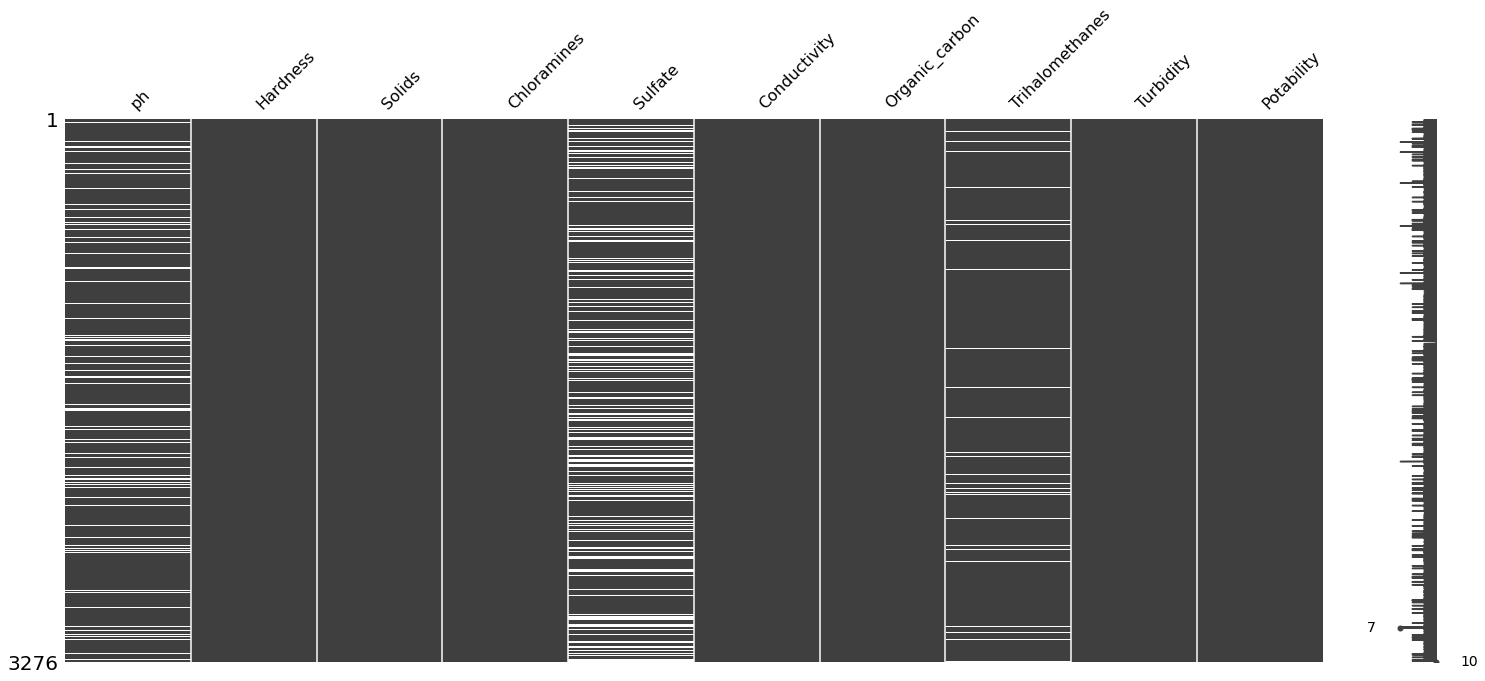

In [137]:
msno.matrix(df) 

<AxesSubplot:>

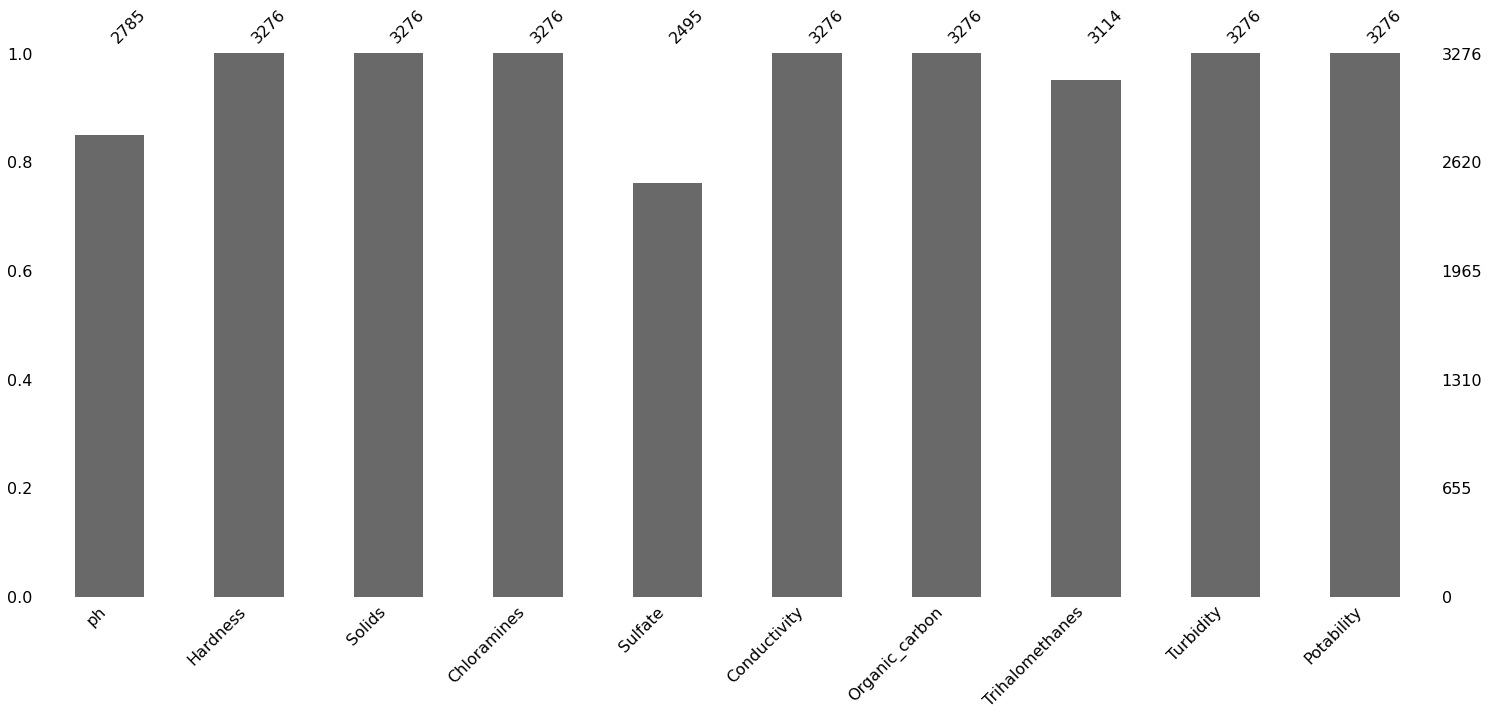

In [138]:
msno.bar(df) 

## Handle with missing data 

In [139]:
#df.fillna(df.mean(), inplace=True)
df0 = df.loc[df['Potability'] == 0, :]
df1 = df.loc[df['Potability'] == 1, :]
df0['ph'].fillna(value=df['ph'].mean(), inplace=True)
df0['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True)
df0['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace=True)
df1['ph'].fillna(value=df1['ph'].mean(), inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(), inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(), inplace=True)
df = pd.concat([df0, df1], axis=0)

In [140]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [141]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080416,196.369496,22014.092526,7.122277,333.667665,426.205111,14.284970,66.398700,3.966786,0.390110
std,1.469957,32.879761,8768.570828,1.583085,36.144259,80.824064,3.308162,15.769892,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## correlation

<AxesSubplot:>

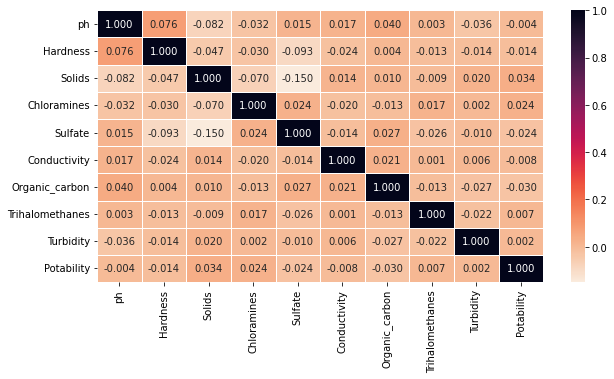

In [142]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="rocket_r",fmt='.3f',linewidths=.8)

0    1998
1    1278
Name: Potability, dtype: int64

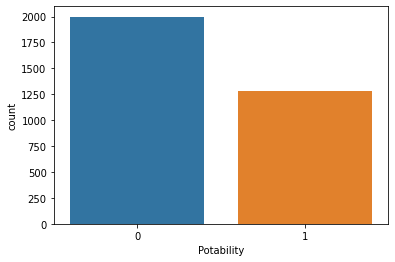

In [143]:
# check dataset is balanced or imbalanced
sns.countplot(data=df,x=df.Potability)
df.Potability.value_counts()

<AxesSubplot:xlabel='ph', ylabel='Density'>

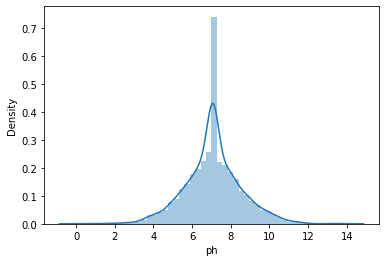

In [144]:
sns.distplot(df.ph)

<AxesSubplot:xlabel='Hardness', ylabel='Density'>

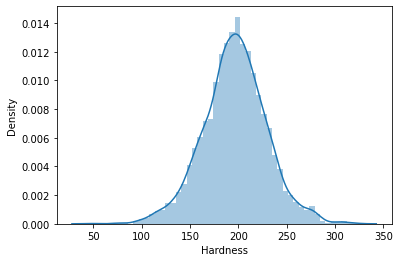

In [145]:
sns.distplot(df.Hardness)

<AxesSubplot:xlabel='Solids', ylabel='Density'>

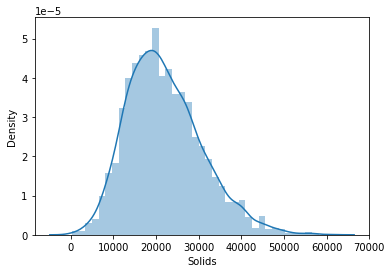

In [146]:
sns.distplot(df.Solids)

In [147]:
# lets see feature importance
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

<AxesSubplot:>

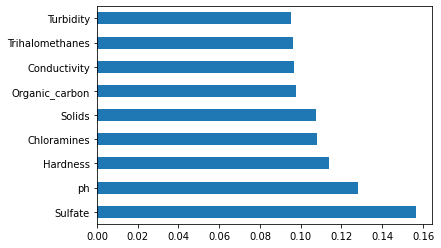

In [148]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [149]:
# standardize the data 
sc = StandardScaler()
X = sc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Modeling 

In [150]:
water_svc = SVC(random_state=1)
water_svc.fit(X_train, y_train)
y_pred_svc = water_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[395  27]
 [149  85]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       422
           1       0.76      0.36      0.49       234

    accuracy                           0.73       656
   macro avg       0.74      0.65      0.65       656
weighted avg       0.74      0.73      0.70       656



In [151]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

In [152]:
print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.95      0.80      1576
           1       0.84      0.38      0.52      1044

    accuracy                           0.72      2620
   macro avg       0.77      0.66      0.66      2620
weighted avg       0.75      0.72      0.69      2620

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       422
           1       0.76      0.36      0.49       234

    accuracy                           0.73       656
   macro avg       0.74      0.65      0.65       656
weighted avg       0.74      0.73      0.70       656

Roc_auc score
-------------------------------------------------------
0.6496334102969175

Confusion matrix
-------------------------------------------------------
[[395  27]
 [149  85]]

accura

In [153]:
y_pred_svm_test=svm.predict(X_test)
y_pred_svm_train=svm.predict(X_train)
acc_svm_test = round((accuracy_score(y_test, y_pred_svm_test) * 100),2)
acc_svm_train = round((accuracy_score(y_train, y_pred_svm_train) * 100),2)

In [154]:

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print('accuracy ', accuracy)

accuracy  0.7728658536585366


max_depth case:
0.6204268292682927
0.739329268292683
0.75
0.7560975609756098
0.7728658536585366
0.7820121951219512
0.7896341463414634


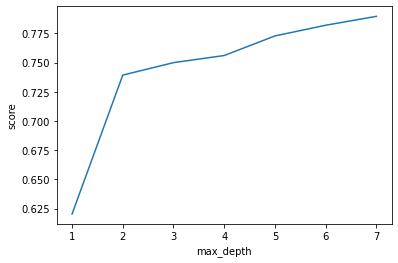

min_samples_split case:
0.7682926829268293
0.7774390243902439
0.7789634146341463
0.7804878048780488
0.7850609756097561
0.7835365853658537
0.7850609756097561
0.7865853658536586
0.7820121951219512
0.7682926829268293
0.7942073170731707


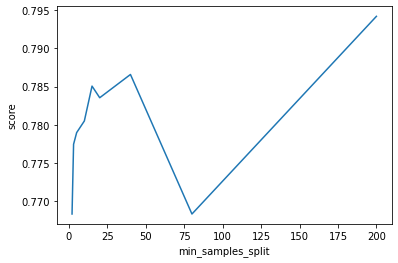

In [155]:



score_depth=[]
mdepth_ar=[]
score_msplit=[]
msplit_ar=[]

print('max_depth case:')
for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    score_depth.append(clf.score(X_test, y_test))
    mdepth_ar.append(mdepth)

plt.plot(mdepth_ar,score_depth )
plt.ylabel('score')
plt.xlabel('max_depth')
plt.show('max_depth')


print('min_samples_split case:')
for msplit in [2, 3, 5, 10, 15, 20, 30, 40, 50, 80,200]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    score_msplit.append(clf.score(X_test, y_test))
    msplit_ar.append(msplit)

plt.plot(msplit_ar,score_msplit )
plt.ylabel('score')
plt.xlabel('min_samples_split')

plt.show('msplit')
    

In [156]:

clf = tree.DecisionTreeClassifier(max_depth=14, min_samples_split=50)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print('accuracy ', accuracy)

accuracy  0.7820121951219512


In [157]:
param_grid = {'max_depth': np.arange(3, 20), 'min_samples_split': np.arange(1, 50)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

clf_decisiontree = grid.best_estimator_
clf_decisiontree.score(X_test,y_test)

0.7419847328244276
{'max_depth': 8, 'min_samples_split': 40}


0.788109756097561

In [158]:
confusion_matrix (y_test, clf_decisiontree.predict(X_test))

array([[368,  54],
       [ 85, 149]])

In [159]:
y_pred_tree_with_grid_test=clf_decisiontree.predict(X_test)
y_pred_tree_with_grid_train=clf_decisiontree.predict(X_train)
acc_tree_with_grid_test = round((accuracy_score(y_test, y_pred_tree_with_grid_test) * 100),2)
acc_tree_with_grid_train = round((accuracy_score(y_train, y_pred_tree_with_grid_train) * 100),2)

In [160]:
y_pred_tree_test=clf.predict(X_test)
y_pred_tree_train=clf.predict(X_train)
acc_tree_test = round((accuracy_score(y_test, y_pred_tree_test) * 100),2)
acc_tree_train = round((accuracy_score(y_train, y_pred_tree_train) * 100),2)

In [161]:
water_forest = RandomForestClassifier()
water_forest.fit(X_train, y_train)

RandomForestClassifier()

In [162]:
y_pred_forest_test = water_forest.predict(X_test)
y_pred_forest_train = water_forest.predict(X_train)
print(confusion_matrix(y_test, y_pred_forest_test))
print(classification_report(y_test, y_pred_forest_test))
water_forest.score(X_test,y_test)

[[378  44]
 [ 71 163]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       422
           1       0.79      0.70      0.74       234

    accuracy                           0.82       656
   macro avg       0.81      0.80      0.80       656
weighted avg       0.82      0.82      0.82       656



0.8246951219512195

In [163]:
acc_forest_test = round((accuracy_score(y_test, y_pred_forest_test) * 100),2)
acc_forest_train = round((accuracy_score(y_train, y_pred_forest_train) * 100),2)

In [182]:

clf_bagging_KNN = BaggingClassifier(KNeighborsClassifier(), n_estimators=100)
clf_bagging_KNN.fit(X_train, y_train)
Z = clf_bagging_KNN.predict(X_test)
accuracy=clf_bagging_KNN.score(X_test,y_test)
print("Accuracy of bagging classifier with KNN ", accuracy)

y_pred_bag_knn_test=clf_bagging_KNN.predict(X_test)
y_pred_bag_knn_train=clf_bagging_KNN.predict(X_train)
acc_bag_knn_test = round((accuracy_score(y_test, y_pred_bag_knn_test) * 100),2)
acc_bag_knn_train = round((accuracy_score(y_train, y_pred_bag_knn_train) * 100),2)

clf_bagging_svc = BaggingClassifier(SVC(), n_estimators=100)
clf_bagging_svc.fit(X_train, y_train)
Z = clf_bagging_svc.predict(X_test)
accuracy=clf_bagging_svc.score(X_test,y_test)
print("Accuracy of bagging classifier with SVC ", accuracy)

y_pred_bag_svc_test=clf_bagging_svc.predict(X_test)
y_pred_bag_svc_train=clf_bagging_svc.predict(X_train)
acc_bag_svc_test = round((accuracy_score(y_test, y_pred_bag_svc_test) * 100),2)
acc_bag_svc_train = round((accuracy_score(y_train, y_pred_bag_svc_train) * 100),2)
    

clf_more_rd = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=20)
clf_more_rd.fit(X_train, y_train)
Z_more_rd = clf_more_rd.predict(X_test)
accuracy_more_rd_test=clf_more_rd.score(X_test,y_test)
accuracy_more_rd_train=clf_more_rd.score(X_train,y_train)
print("Accuracy of bagging classifier with Decision Tree ", accuracy_more_rd_test)

y_pred_bag_tree_test=clf_more_rd.predict(X_test)
y_pred_bag_tree_train=clf_more_rd.predict(X_train)
acc_bag_tree_test = round((accuracy_score(y_test, y_pred_bag_tree_test) * 100),2)
acc_bag_tree_train = round((accuracy_score(y_train, y_pred_bag_tree_train) * 100),2)

Accuracy of bagging classifier with KNN  0.6417682926829268
Accuracy of bagging classifier with SVC  0.7347560975609756
Accuracy of bagging classifier with Decision Tree  0.8109756097560976


In [165]:
clf_adaboost= AdaBoostClassifier(n_estimators=100)
clf_adaboost.fit(X_train, y_train)
accuracy_boost_test=clf_adaboost.score(X_test,y_test)
accuracy_boost_train=clf_adaboost.score(X_train,y_train)
print("Accuracy of boosting classifier with adaboost ", accuracy_boost_test)
y_pred_ada_boosting_test=clf_adaboost.predict(X_test)
y_pred_ada_boosting_train=clf_adaboost.predict(X_train)
acc_boost_ada_test = round((accuracy_score(y_test, y_pred_ada_boosting_test) * 100),2)
acc_boost_ada_train = round((accuracy_score(y_train, y_pred_ada_boosting_train) * 100),2)

Accuracy of boosting classifier with adaboost  0.7667682926829268


In [166]:
clf_GaussianNB = GaussianNB()
clf_GaussianNB.fit(X_train, y_train)
accuracy_GaussianNB_test=clf_GaussianNB.score(X_test,y_test)
accuracy_GaussianNB_train=clf_GaussianNB.score(X_train,y_train)
print("Accuracy of GaussianNB ", accuracy_GaussianNB_test)

Accuracy of GaussianNB  0.6478658536585366


In [167]:
estimators = [('decisiontree', tree.DecisionTreeClassifier(max_depth=8, min_samples_split=40)),
             ('svc', SVC(random_state=1)),
              ('AdaBoostClassifier', AdaBoostClassifier())]

final_estimator = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=40)
stack_clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [168]:
stack_clf.fit(X_train, y_train)
accuracy_stack=stack_clf.score(X_test,y_test)
print("Accuracy of stacking ", accuracy_stack)

Accuracy of stacking  0.8094512195121951


In [169]:
y_pred_stacking_test=stack_clf.predict(X_test)
y_pred_stacking_train=stack_clf.predict(X_train)
acc_bag_rd_test = round((accuracy_score(y_test, y_pred_stacking_test) * 100),2)
acc_bag_rd_train = round((accuracy_score(y_train, y_pred_stacking_train) * 100),2)

In [170]:
'''
param_grid_RF = {'max_depth': np.arange(3, 20), 'min_samples_split': np.arange(1, 50),'criterion':{'gini', 'entropy'}}
grid_RF = GridSearchCV(RandomForestClassifier(), param_grid)
grid_RF.fit(X_train, y_train)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

clf_randomforestgrid = grid_RF.best_estimator_
clf_randomforestgrid.score(X_test,y_test)
'''

"\nparam_grid_RF = {'max_depth': np.arange(3, 20), 'min_samples_split': np.arange(1, 50),'criterion':{'gini', 'entropy'}}\ngrid_RF = GridSearchCV(RandomForestClassifier(), param_grid)\ngrid_RF.fit(X_train, y_train)\nprint(grid_RF.best_score_)\nprint(grid_RF.best_params_)\n\nclf_randomforestgrid = grid_RF.best_estimator_\nclf_randomforestgrid.score(X_test,y_test)\n"

In [171]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state = [1, 2, 4, None]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,'random_state':random_state}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [1, 2, 4, None]}


In [172]:
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5)
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
rf_random.score(X_test,y_test)
"""

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5)\n# Fit the random search model\nrf_random.fit(X_train, y_train)\nprint(rf_random.best_params_)\nrf_random.score(X_test,y_test)\n'

In [173]:
water_forest_grid = RandomForestClassifier(random_state= 1, n_estimators= 140, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap=True)
water_forest_grid.fit(X_train, y_train)
y_pred_forest_grid_test = water_forest_grid.predict(X_test)
y_pred_forest_grid_train = water_forest_grid.predict(X_train)
print(confusion_matrix(y_test, y_pred_forest_grid_test))
print(classification_report(y_test, y_pred_forest_grid_test))
water_forest_grid.score(X_test,y_test)

[[396  26]
 [ 75 159]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       422
           1       0.86      0.68      0.76       234

    accuracy                           0.85       656
   macro avg       0.85      0.81      0.82       656
weighted avg       0.85      0.85      0.84       656



0.8460365853658537

In [174]:
y_pred_random_grid_test=water_forest_grid.predict(X_test)
y_pred_random_grid_train=water_forest_grid.predict(X_train)
acc_random_forest_grid_test = round((accuracy_score(y_test, y_pred_random_grid_test) * 100),2)
acc_random_forest_grid_train = round((accuracy_score(y_train, y_pred_random_grid_train) * 100),2)

In [183]:
accuracy = pd.DataFrame({
    'Models': ['Support Vector Machine', 
                'Decision Tree', 'Random Forest','Bagging with KNN','Bagging with SVC','Bagging with Tree','Decision Tree with grid','AdaBoost','Stacking','Random Forest with Grid'],
    'Test_Score' : [acc_svm_test,acc_tree_test, acc_forest_test,acc_bag_knn_test,acc_bag_svc_test,acc_bag_tree_test,acc_tree_with_grid_test,acc_boost_ada_test,acc_bag_rd_test,acc_random_forest_grid_test],
    'Train_Score': [acc_svm_train,acc_tree_train, acc_forest_train,acc_bag_knn_train,acc_bag_svc_train,acc_bag_tree_train,acc_tree_with_grid_train,acc_boost_ada_train,acc_bag_rd_train,acc_random_forest_grid_train]})
#accuracy['Score'] = accuracy['Score'].astype(str) + '%'
accuracy.sort_values(by='Test_Score', ascending=False)

,Models,Test_Score,Train_Score
9,Random Forest with Grid,84.60,92.67
2,Random Forest,82.47,100.00
5,Bagging with Tree,81.10,99.66
8,Stacking,80.95,81.15
6,Decision Tree with grid,78.81,81.34
1,Decision Tree,78.20,84.96
7,AdaBoost,76.68,77.94
4,Bagging with SVC,73.48,73.05
0,Support Vector Machine,73.17,72.29
3,Bagging with KNN,64.18,76.87
